In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
customer = pd.read_json('/Users/erica/Desktop/itmgt/GITHUB/dy-itm25/dim_customer.json')
invoice = pd.read_csv('/Users/erica/Desktop/itmgt/GITHUB/dy-itm25/fct_invoice.csv')

In [4]:
customer

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


# Easy
<font color=7EBC80>**How many unique customers are in the dataset?**</font>

In [5]:
customer_id = invoice['customer_id']

customer_id.nunique()

5191

<u>*answer: there are 5191 unique customers in the dataset*<u>

<font color=7EBC80>**What are the different categories of products available? How many unique categories are there?**</font>

In [6]:
category = invoice['category']

category.unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [7]:
category.nunique()

8

<u>*answer: there are 8 unique categories - clothing, shoes, books, cosmetics, food & bevarage, toys, technology, and souvenir*<u>

<font color=7EBC80>**Which payment method is the most popular? How many times was it used?**</font>

In [8]:
payment_method = invoice['payment_method']

In [9]:
payment_method.value_counts()

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

<u>*answer: cash is the most popular payment method, used 44,447 times*<u>

# Medium
<font color=7EBC80>**What are the three most popular categories, by total sales?**</font>

In [10]:
price = invoice['price']
quantity = invoice['quantity']

total_price = price * quantity

invoice.insert(5,'total_price',total_price,True)

In [11]:
invoice.groupby('category').sum()['total_price'].rank(ascending=False)

category
Books              7.0
Clothing           1.0
Cosmetics          4.0
Food & Beverage    6.0
Shoes              2.0
Souvenir           8.0
Technology         3.0
Toys               5.0
Name: total_price, dtype: float64

<u>*answer: the three most popular categories by total sales are clothing, shoes, and technology*<u>

<font color=7EBC80>**What are the total sales attributed to customers over the age of 45?**</font>

In [12]:
merged = pd.merge(
    invoice , 
    customer,
    how = 'inner',
    left_on = 'customer_id',
    right_on = 'id'
)

In [13]:
age = merged['age']

over_45 = age > 45

merged[over_45].sum()['total_price']

82039768.15

<u>*answer: the total sales attributed to customers over the age of 45 is 82,039,768.15*<u>

<font color=7EBC80>**How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)**</font>

In [24]:
merged

,invoice_no,customer_id,category,quantity,price,total_price,payment_method,invoice_date,shopping_mall,age,first_name,gender,id,last_name,year
0,I138884,229,Clothing,5,1500.40,7502.00,Credit Card,2022-08-05,Kanyon,NaN,William,M,229,Anderson,2022
1,I126377,229,Cosmetics,2,81.32,162.64,Credit Card,2021-04-05,Metrocity,NaN,William,M,229,Anderson,2021
2,I178419,229,Shoes,3,1800.51,5401.53,Debit Card,2021-06-01,Istinye Park,NaN,William,M,229,Anderson,2021
3,I847727,229,Clothing,3,900.24,2700.72,Credit Card,2022-08-21,Zorlu Center,NaN,William,M,229,Anderson,2022
4,I219251,229,Shoes,5,3000.85,15004.25,Credit Card,2022-06-23,Istinye Park,NaN,William,M,229,Anderson,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,600.17,Cash,2021-11-08,Kanyon,NaN,Melissa,F,4973,Bell,2021
99453,I989120,6161,Books,5,75.75,378.75,Cash,2021-01-08,Viaport Outlet,36.0,Leslie,F,6161,Bass,2021
99454,I791963,6779,Clothing,5,1500.40,7502.00,Credit Card,2021-03-06,Metropol AVM,NaN,Kelly,F,6779,Roberts,2021
99455,I100582,8386,Clothing,2,600.16,1200.32,Cash,2021-11-02,Istinye Park,47.0,Shawn,M,8386,Perez,2021


In [19]:
merged['invoice_date'] = pd.to_datetime(merged['invoice_date'],format='mixed', dayfirst=True)

date = merged['invoice_date']

In [23]:
merged['year'] = merged['invoice_date'].dt.year

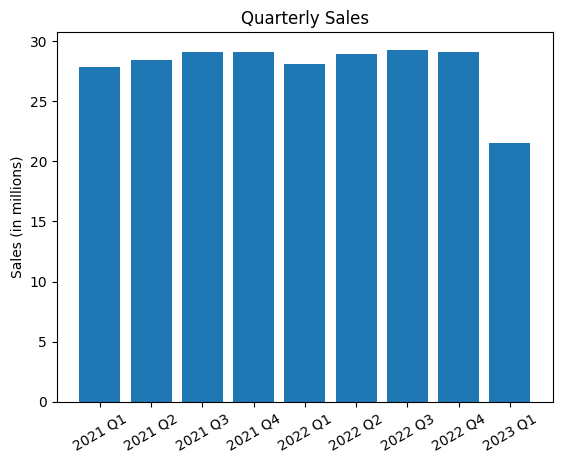

In [26]:
import matplotlib.pyplot as plt

year_list = merged['year'].unique().tolist()
year_list.sort()
quarterly_sales_by_year = []
quarterly_sales = []
quarters = ['Q1','Q2','Q3','Q4']
num_quarters = []
x_axis = []

for year in year_list:
    quarterly_sales_by_year.append(list(merged.loc[merged['year'] == year].groupby(merged.invoice_date.dt.quarter)['total_price'].sum()/1000000))
    quarterly_sales.extend(list(merged.loc[merged['year'] == year].groupby(merged.invoice_date.dt.quarter)['total_price'].sum()/1000000))
    
for i in range(3):
    num_quarters.append(len(quarterly_sales_by_year[i]))
    
for year, num_quarter in zip(year_list, num_quarters):
    for quarter in range(1, num_quarter + 1):
        x_axis.append(f"{year} Q{quarter}")

fig, ax = plt.subplots()

ax.bar(x_axis, quarterly_sales)

ax.set_ylabel('Sales (in millions)')
ax.set_title('Quarterly Sales')
plt.xticks(rotation=30)
plt.show()


# Hard
<font color=7EBC80>**Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).**</font>

In [ ]:
merged

In [ ]:
categories = list(merged['category'].unique())

labels = []
for i in range(10):
    start_age = i * 10
    end_age = start_age + 9
    range_label = f"{start_age}-{end_age}"
    labels.append(range_label)

    bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]

merged['age_range'] = pd.cut(merged['age'], 
                             bins=bins, 
                             labels=labels, 
                             right=False)

pd.pivot_table(merged, values='total_price', 
               index='category',
               columns='age_range', 
               aggfunc='sum')

age_range,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99
category,,,,,,,,,,
Books,0.0,7923.45,76022.70,87157.95,87885.15,72735.15,81885.75,57706.35,29224.35,0.0
Clothing,0.0,1144505.12,9959955.28,11540776.72,11447451.84,9943150.80,11083154.72,8061649.20,4812382.96,0.0
Cosmetics,0.0,65991.18,583796.28,731310.76,682396.78,563954.20,669832.84,443722.58,274495.66,0.0
Food & Beverage,0.0,9434.92,68633.29,87911.07,91922.48,72132.16,81488.63,58256.97,33879.94,0.0
Shoes,0.0,634379.69,5571978.28,7303468.73,7163028.95,5778436.76,6131336.72,4675324.30,2827400.87,0.0
Souvenir,0.0,6181.71,54438.93,63834.66,68444.55,54966.78,57418.35,38216.34,26662.29,0.0
Technology,0.0,739200.00,5053650.00,6298950.00,6082650.00,4458300.00,5421150.00,3808350.00,2134650.00,0.0
Toys,0.0,35911.68,366392.32,424704.00,408253.44,330516.48,370693.12,293888.00,162856.96,0.0
